In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#url = 'https://github.com/mianusman966/ml_proj/blob/main/superstore_sales.xlsx?raw=true'
ds = pd.read_excel('superstore_sales.xlsx')

In [6]:
ds.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [7]:
ds.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

#Project 1: Descriptive Analysis

##Task -1: Find median, mean, St. dev of 
Profit

Sale


In [9]:
#getting required column from main df and perform task 1
profit = ds['profit']
sales = ds['sales']
print("In Profit The Median = {} and Mean = {} and St.Dev = {}".format(profit.median(),profit.mean(),profit.std()))
print("In Profit The Median = {} and Mean = {} and St.Dev = {}".format(sales.median(),sales.mean(),sales.std()))

In Profit The Median = 9.24 and Mean = 28.641739545330367 and St.Dev = 174.42411298385855
In Profit The Median = 85.053 and Mean = 246.49058120258002 and St.Dev = 487.56536053856195


##Task-2: Find total sale in each year. For example, what is total sale in 2011, 2012 etc.

In [10]:
#getting required columns
sale_df = ds[['sales','year']]
#now group sales column according year
sale_grp = sale_df.groupby(['year']).sum()
sale_grp['sales'] = sale_grp['sales'].astype(int)
sale_grp.reset_index(inplace=True)
sale_grp

,year,sales
0,2011,2259450
1,2012,2677438
2,2013,3405746
3,2014,4299865


In [11]:
sale_2011 = sale_grp.at[0,'sales']
sale_2012 = sale_grp.at[1,'sales']

Total Sale in 2011 is = 2259450
Total Sale in 2012 is = 2677438


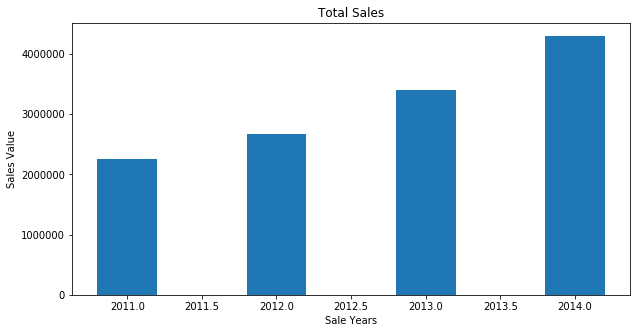

In [12]:
print("Total Sale in 2011 is = {}".format(sale_2011))
print("Total Sale in 2012 is = {}".format(sale_2012))
#making bar plot
fig = plt.figure(figsize = (10, 5))
y=sale_grp['sales']
x=sale_grp['year']
plt.bar(x,y,width = 0.4)
plt.xlabel("Sale Years") 
plt.ylabel("Sales Value") 
plt.title("Total Sales") 
plt.show()

##Task-3: Find total numbers of each categories. For example, how many office supplies, furniture

In [13]:
ds.groupby(['category']).size().reset_index(name='Count')

,category,Count
0,Furniture,9876
1,Office Supplies,31273
2,Technology,10141


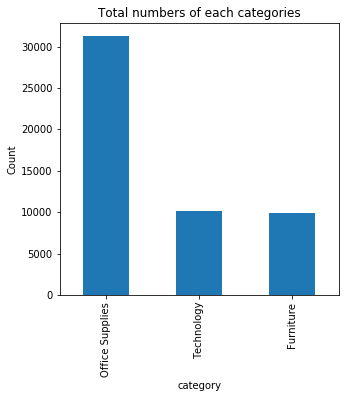

In [14]:
#making bar plot
#ds.groupby(['category']).size().plot.bar()
ds['category'].value_counts().plot(kind = "bar", figsize = (5,5))
plt.xlabel("category") 
plt.ylabel("Count") 
plt.title("Total numbers of each categories") 
plt.show()

##Task-4: Find average order priority. For example, on average how many orders were on Medium, high and low priority

In [15]:
ds['order_priority'].value_counts(normalize = True)

Medium      0.573855
High        0.302223
Critical    0.076662
Low         0.047261
Name: order_priority, dtype: float64

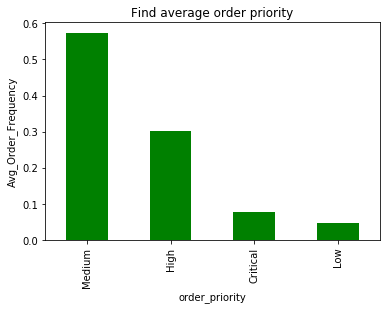

In [16]:
#making bar plot
ds['order_priority'].value_counts(normalize = True).plot.bar(color="green")
plt.xlabel("order_priority") 
plt.ylabel("Avg_Order_Frequency") 
plt.title("Find average order priority") 
plt.show()

#Project 2 : Machine Learning Model
###Predict the sales in future
###Use supervised learning algorithms such as SVM, KNN
###Find the accuracy and plot it

In [17]:
ds.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [18]:
ds.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [19]:
ds.head().T

,0,1,2,3,4
order_id,AG-2011-2040,IN-2011-47883,HU-2011-1220,IT-2011-3647632,IN-2011-47883
order_date,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00
ship_date,2011-01-06 00:00:00,2011-01-08 00:00:00,2011-01-05 00:00:00,2011-01-05 00:00:00,2011-01-08 00:00:00
ship_mode,Standard Class,Standard Class,Second Class,Second Class,Standard Class
customer_name,Toby Braunhardt,Joseph Holt,Annie Thurman,Eugene Moren,Joseph Holt
segment,Consumer,Consumer,Consumer,Home Office,Consumer
state,Constantine,New South Wales,Budapest,Stockholm,New South Wales
country,Algeria,Australia,Hungary,Sweden,Australia
market,Africa,APAC,EMEA,EU,APAC
region,Africa,Oceania,EMEA,North,Oceania


In [20]:
pd.api.types.is_string_dtype(ds["category"])

True

In [21]:
# These columns contain strings
for label, content in ds.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

order_id
ship_mode
customer_name
segment
state
country
market
region
product_id
category
sub_category
product_name
order_priority


In [22]:
# This will turn all of the string values into category values
for label, content in ds.items():
    if pd.api.types.is_string_dtype(content):
        ds[label] = content.astype("category").cat.as_ordered()

In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  category      
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  category      
 4   customer_name   51290 non-null  category      
 5   segment         51290 non-null  category      
 6   state           51290 non-null  category      
 7   country         51290 non-null  category      
 8   market          51290 non-null  category      
 9   region          51290 non-null  category      
 10  product_id      51290 non-null  category      
 11  category        51290 non-null  category      
 12  sub_category    51290 non-null  category      
 13  product_name    51290 non-null  category      
 14  sales           51290 non-null  float64       
 15  qu

In [24]:
#Save Processed Data & Genrate CSV
ds.to_csv("testingset.csv",index=False)
#ds.to_csv("testingset.csv",index=False)
#!cp testingset.csv "/content/"

In [25]:
# Import preprocessed data
ds_tmp = pd.read_csv("testingset.csv",low_memory=False)
ds_tmp.head().T

,0,1,2,3,4
order_id,AG-2011-2040,IN-2011-47883,HU-2011-1220,IT-2011-3647632,IN-2011-47883
order_date,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
ship_date,2011-01-06,2011-01-08,2011-01-05,2011-01-05,2011-01-08
ship_mode,Standard Class,Standard Class,Second Class,Second Class,Standard Class
customer_name,Toby Braunhardt,Joseph Holt,Annie Thurman,Eugene Moren,Joseph Holt
segment,Consumer,Consumer,Consumer,Home Office,Consumer
state,Constantine,New South Wales,Budapest,Stockholm,New South Wales
country,Algeria,Australia,Hungary,Sweden,Australia
market,Africa,APAC,EMEA,EU,APAC
region,Africa,Oceania,EMEA,North,Oceania


In [26]:
# Turn categorical variables into numbers
for label, content in ds_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        ds_tmp[label] = pd.Categorical(content).codes+1

In [27]:
ds_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  int16  
 1   order_date      51290 non-null  int16  
 2   ship_date       51290 non-null  int16  
 3   ship_mode       51290 non-null  int8   
 4   customer_name   51290 non-null  int16  
 5   segment         51290 non-null  int8   
 6   state           51290 non-null  int16  
 7   country         51290 non-null  int16  
 8   market          51290 non-null  int8   
 9   region          51290 non-null  int8   
 10  product_id      51290 non-null  int16  
 11  category        51290 non-null  int8   
 12  sub_category    51290 non-null  int8   
 13  product_name    51290 non-null  int16  
 14  sales           51290 non-null  float64
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [28]:
ds_tmp.head(24)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,10,1,3,4,752,1,256,3,2,1,...,2,15,3414,408.3000,2,0.00,106.1400,35.460,4,2011
1,10996,1,5,4,399,1,703,7,1,10,...,2,16,169,120.3660,3,0.10,36.0360,9.720,4,2011
2,9013,1,2,3,49,1,176,57,4,6,...,2,15,3383,66.1200,4,0.00,29.6400,8.170,2,2011
3,14940,1,2,3,276,3,940,124,5,8,...,2,13,1331,44.8650,3,0.50,-26.0550,4.820,2,2011
4,10996,1,5,4,399,1,703,7,1,10,...,1,10,1229,113.6700,5,0.10,37.7700,4.700,4,2011
5,10996,1,5,4,399,1,703,7,1,10,...,2,13,1144,55.2420,2,0.10,15.3420,1.800,4,2011
6,943,2,3,4,484,1,749,23,3,2,...,3,12,2663,314.2200,1,0.00,3.1200,24.100,4,2011
7,11292,3,1,2,430,2,703,7,1,10,...,2,2,1917,276.1020,1,0.10,110.4120,125.320,1,2011
8,9284,3,6,4,443,1,97,92,1,10,...,3,7,1778,912.4560,4,0.40,-319.4640,107.100,3,2011
9,15880,3,4,4,466,2,711,61,4,6,...,1,6,2561,666.8400,4,0.00,253.3200,81.260,2,2011


# Modeling

## KNN

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [30]:
scalar = StandardScaler()

In [31]:
X = ds_tmp.drop('sales',axis = 1)
y = ds_tmp['sales']

In [32]:
X.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,quantity,discount,profit,shipping_cost,order_priority,year
0,10,1,3,4,752,1,256,3,2,1,7847,2,15,3414,2,0.0,106.140,35.46,4,2011
1,10996,1,5,4,399,1,703,7,1,10,7465,2,16,169,3,0.1,36.036,9.72,4,2011
2,9013,1,2,3,49,1,176,57,4,6,7859,2,15,3383,4,0.0,29.640,8.17,2,2011
3,14940,1,2,3,276,3,940,124,5,8,6207,2,13,1331,3,0.5,-26.055,4.82,2,2011
4,10996,1,5,4,399,1,703,7,1,10,1493,1,10,1229,5,0.1,37.770,4.70,4,2011


In [33]:
transform_X = scalar.fit_transform(X)

In [34]:
X = pd.DataFrame(transform_X,columns = X.columns)

In [35]:
X.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,quantity,discount,profit,shipping_cost,order_priority,year
0,-1.741470,-2.069047,-2.084394,0.688110,1.539255,-0.868111,-1.007483,-1.650976,-1.059513,-1.686862,0.960716,-0.008271,1.342223,1.407903,-0.647964,-0.673210,0.444314,0.158548,0.815568,-1.617231
1,-0.217654,-2.069047,-2.079546,0.688110,-0.000837,-0.868111,0.462503,-1.565293,-1.510165,0.821529,0.827137,-0.008271,1.548637,-1.566599,-0.209126,-0.202129,0.042393,-0.290696,0.815568,-1.617231
2,-0.492707,-2.069047,-2.086818,-0.235166,-1.527840,-0.868111,-1.270568,-0.494256,-0.158207,-0.293311,0.964912,-0.008271,1.342223,1.379488,0.229712,-0.673210,0.005723,-0.317749,-1.034438,-1.617231
3,0.329399,-2.069047,-2.086818,-0.235166,-0.537470,1.742202,1.241891,0.940933,0.292445,0.264109,0.387238,-0.008271,0.929393,-0.501462,-0.209126,1.682194,-0.313588,-0.376217,-1.034438,-1.617231
4,-0.217654,-2.069047,-2.079546,0.688110,-0.000837,-0.868111,0.462503,-1.565293,-1.510165,0.821529,-1.261160,-1.609051,0.310149,-0.594959,0.668550,-0.202129,0.052334,-0.378311,0.815568,-1.617231


In [36]:
X.describe()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,quantity,discount,profit,shipping_cost,order_priority,year
count,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04,5.129000e+04
mean,-6.286170e-16,-1.325538e-14,-1.704837e-14,7.518346e-16,1.473719e-16,-8.268943e-16,-2.015632e-16,1.290300e-15,1.334995e-15,3.504313e-16,5.194497e-17,-6.089811e-16,-4.362869e-16,-9.671863e-17,-4.121484e-16,8.241842e-16,1.944893e-17,-3.008577e-17,3.509274e-15,-6.810393e-13
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.742719e+00,-2.069047e+00,-2.089242e+00,-2.081719e+00,-1.737258e+00,-8.681111e-01,-1.846065e+00,-1.693817e+00,-1.510165e+00,-1.686862e+00,-1.782885e+00,-1.609051e+00,-1.547583e+00,-1.720595e+00,-1.086803e+00,-6.732098e-01,-3.800326e+01,-4.603062e-01,-1.959441e+00,-1.617231e+00
25%,-8.535833e-01,-8.013807e-01,-7.923663e-01,-2.351664e-01,-8.690474e-01,-8.681111e-01,-8.233236e-01,-7.513050e-01,-1.059513e+00,-8.507318e-01,-7.634759e-01,-8.270750e-03,-9.283389e-01,-9.121171e-01,-6.479644e-01,-6.732098e-01,-1.642091e-01,-4.147884e-01,-1.034438e+00,-7.072468e-01
50%,-5.504560e-03,1.333382e-01,1.384752e-01,6.881101e-01,3.525764e-03,-8.681111e-01,3.499023e-02,4.126194e-02,2.924454e-01,-1.460118e-02,-2.014063e-02,-8.270750e-03,-1.026801e-01,-1.380807e-02,-2.091262e-01,-6.732098e-01,-1.112342e-01,-3.243810e-01,8.155680e-01,2.027371e-01
75%,8.670209e-01,9.126817e-01,9.093283e-01,6.881101e-01,8.673732e-01,4.370455e-01,8.505528e-01,1.176561e+00,7.430981e-01,1.100240e+00,7.998623e-01,-8.270750e-03,9.293933e-01,9.413328e-01,6.685502e-01,2.689515e-01,4.683034e-02,-3.361159e-02,8.155680e-01,1.112721e+00
max,1.729629e+00,1.455263e+00,1.457167e+00,6.881101e-01,1.726858e+00,1.742202e+00,1.748329e+00,1.433609e+00,1.193751e+00,1.657660e+00,1.815687e+00,1.592509e+00,1.755052e+00,1.750728e+00,4.618094e+00,3.330976e+00,4.799460e+01,1.583340e+01,8.155680e-01,1.112721e+00


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import utils

In [39]:
knn = KNeighborsRegressor()

In [40]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [41]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[17743  3901 11177 ... 18966  2381 19583]
continuous
multiclass
multiclass


In [42]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [43]:
predictions = knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, auc, accuracy_score

In [45]:
knn.score(X_test,y_test)

0.7903500644944398

In [ ]:
error_rate = []

for i in range(1,41):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,41), error_rate, color = 'blue', marker = 'o',markersize = 10)
plt.show()

# SVM

In [ ]:
grid = {
    "n_neighbors" : [2,5],  
    "algorithm" : ['auto', 'ball_tree'],
    "leaf_size" : [20,30,40],
    "metric_params" : [None,'dict'],
    "metric" : [str,'minkowski'],
    "weights" : ['uniform','distance']
}